# Big Data projekt - K√©ki B√°lint

"Data 12" dataset

## Adatk√©szlet

Ez az adathalmaz k√ºl√∂nb√∂z≈ë amerikai fels≈ëoktat√°si int√©zm√©nyek jellemz≈ëit tartalmazza.

Az adatok c√©lja, hogy meg√©rts√ºk, milyen t√©nyez≈ëk befoly√°solj√°k a hallgat√≥k j√∂vedelm√©t, int√©zm√©ny t√≠pus√°t, illetve hogy csoportos√≠that√≥k-e az egyetemek bizonyos jellemz≈ëk alapj√°n.

## Attrib√∫tumok ismertet√©se

**School**:	Az int√©zm√©ny neve

**Public**:	Bin√°ris v√°ltoz√≥: 
> **1** = √°llami
>
> **0** = mag√°n

**Town/State**:	Az egyetem f√∂ldrajzi elhelyezked√©se: v√°ros / √°llam

**Earn**: Az egyetem volt hallgat√≥inak √°tlagos √©ves j√∂vedelme 5 √©vvel a diploma megszerz√©se ut√°n (USD)

**Price**: Az int√©zm√©ny √©ves tand√≠ja t√°mogat√°s n√©lk√ºl (USD)

**Price_with_aid**: Az int√©zm√©ny t√©nyleges √°tlagos k√∂lts√©ge egy hallgat√≥nak, figyelembe v√©ve a t√°mogat√°sokat (USD)

**SAT**: A felv√©telt nyert hallgat√≥k √°tlagos SAT pontsz√°ma

**ACT**: A felv√©telt nyert hallgat√≥k √°tlagos ACT pontsz√°ma

**need_fraction**: Azon hallgat√≥k ar√°nya, akik szoci√°lis alapon t√°mogat√°st kapnak

**merit_aided**: Azon hallgat√≥k ar√°nya, akik tanulm√°nyi √©rdemalap√∫ √∂szt√∂nd√≠jban r√©szes√ºlnek


## Mi az SAT (Scholastic Assessment Test)?

A SAT az Egyes√ºlt √Ållamokban alkalmazott standardiz√°lt felv√©teli teszt, amelyet a k√∂z√©piskol√°s di√°kok teljes√≠tenek az egyetemre val√≥ jelentkez√©s sor√°n.

>Pontsz√°m tartom√°ny: 400 ‚Äì 1600
>
>800 pont = √°tlagos teljes√≠tm√©ny
>
>1200‚Äì1400+ pont = kiemelked≈ë eredm√©ny

A SAT pontsz√°m az egyetemek sz√°m√°ra egy objekt√≠v m√©r≈ësz√°m a jelentkez≈ëk tud√°sszintj√©r≈ël.

## Mi az ACT (American College Testing)?

Az ACT egy m√°sik sz√©les k√∂rben elfogadott felv√©teli teszt.

> Pontsz√°m tartom√°ny: 1 ‚Äì 36
>
>A magasabb √©rt√©k jobb teljes√≠tm√©nyt jelez

T√∂bb r√©szter√ºletre f√≥kusz√°l.

 ## Sz√ºks√©ges Python k√∂nyvt√°rak import√°l√°sa

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score, f1_score

sns.set(style="whitegrid")


## Adatok bet√∂lt√©se √©s szerkezeti √°ttekint√©se

In [2]:

df = pd.read_csv("data_12.csv")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   School          706 non-null    object 
 1   Public          706 non-null    int64  
 2   Town            706 non-null    object 
 3   State           706 non-null    object 
 4   Earn            706 non-null    int64  
 5   SAT             706 non-null    int64  
 6   ACT             706 non-null    int64  
 7   Price           706 non-null    int64  
 8   Price_with_aid  706 non-null    int64  
 9   need_fraction   687 non-null    float64
 10  merit_aided     645 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 60.8+ KB
None


## Le√≠r√≥ statisztik√°k

In [3]:
print(df.describe())

           Public          Earn          SAT         ACT         Price  \
count  706.000000    706.000000   706.000000  706.000000    706.000000   
mean     0.379603  45597.696884  1141.777620   24.981586  42199.787535   
std      0.485632   6723.932021   136.571983    3.451130  15726.765028   
min      0.000000  28300.000000   810.000000   15.000000  16500.000000   
25%      0.000000  41100.000000  1040.000000   23.000000  25900.000000   
50%      0.000000  44750.000000  1120.000000   25.000000  44000.000000   
75%      1.000000  48900.000000  1220.000000   27.000000  55500.000000   
max      1.000000  79700.000000  1550.000000   34.000000  70400.000000   

       Price_with_aid  need_fraction  merit_aided  
count      706.000000     687.000000   645.000000  
mean     23491.359773       0.572242     0.156667  
std       8270.413584       0.171056     0.106342  
min       2200.000000       0.070000     0.010000  
25%      16900.000000       0.440000     0.070000  
50%      23100.000000

## Adattiszt√≠t√°s √©s el≈ëfeldolgoz√°s

 ### Hi√°nyz√≥ √©rt√©kek kezel√©se

In [4]:
for col in ['SAT', 'ACT', 'Earn', 'Price', 'Price_with_aid', 'need_fraction', 'merit_aided']:
    df[col] = df[col].fillna(df[col].median())

### Duplik√°lt sorok elt√°vol√≠t√°sa

In [5]:
df.drop_duplicates(inplace=True)

### V√°ltoz√≥k t√≠pus√°nak egys√©ges√≠t√©se

In [6]:

df['Public'] = df['Public'].astype(int)


# SAT pontsz√°mok eloszl√°sa

Megvizsg√°ljuk az egyetemek √°ltal elfogadott di√°kok √°tlagos SAT pontsz√°mainak eloszl√°s√°t.

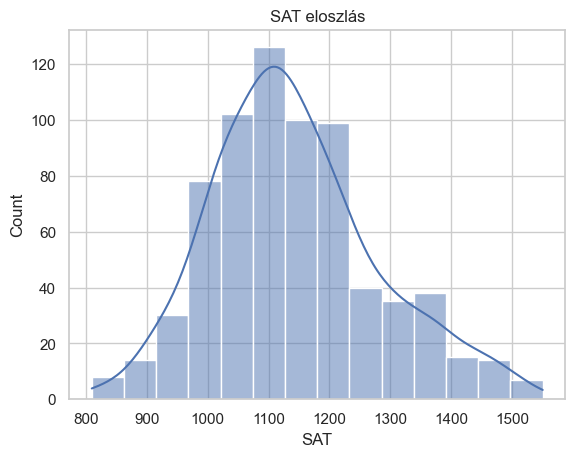

In [7]:
sns.histplot(df['SAT'], bins=14, kde=True)
plt.title("SAT eloszl√°s")
plt.show()

### V√°ltoz√≥k:
>- x tengely: SAT el√©rt pontsz√°mok
>- y tengely: az adott pontsz√°mtartom√°nyba es≈ë tanul√≥k sz√°ma

### Megfigyel√©sek:
> Az adatok k√∂zel norm√°lis eloszl√°st mutatnak, enyh√©n jobbra ferd√ºl.
> 
> A legt√∂bb hallgat√≥ SAT pontsz√°ma 1050 √©s 1150 k√∂z√∂tt tal√°lhat√≥.
>
> A cs√∫cs a 1100-as pontsz√°mn√°l tal√°lhat√≥.
>
### K√∂vetkeztet√©sek:
> Az amerikai fels≈ëoktat√°s t√∫lnyom√≥ r√©sze k√∂zepesen szelekt√≠v.
> 
> Az elit int√©zm√©nyek kisebb h√°nyadot k√©pviselnek.
>
> Kev√©s int√©zm√©nyhez tartozik kimagasl√≥ SAT pontsz√°m.
>
> Az adatok t√∂bbs√©ge a k√∂z√©pmez≈ënyh√∂z tartozik.

# Boxplot elemz√©s

Boxplot seg√≠ts√©g√©vel megvizsg√°ljuk hogy az egyetem t√≠pusa hat√°ssal van-e a diplom√°t k√∂vet≈ë √°tlagos j√∂vedelemre. 

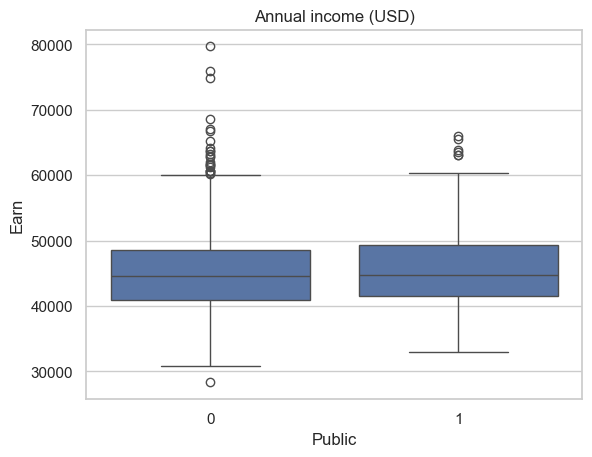

In [8]:

sns.boxplot(x='Public', y='Earn', data=df)
plt.title("Annual income (USD)")
plt.show()


### V√°ltoz√≥k:
* x tengely:

> **0**: mag√°nint√©zm√©ny (private)
>
>**1**: √°llami int√©zm√©ny (public)

* y tengely: a hallgat√≥k √°tlagos keresete a diploma megszerz√©se ut√°n

### Megfigyel√©sek: 
>  A medi√°n j√∂vedelmek nagyon hasonl√≥ak
> 
> A j√∂vedelmek eloszl√°sa is hasonl√≥
> 
> A mag√°nint√©zm√©nyekb≈ël v√©gzettek t√∂bben √©rnek el extr√©m magas j√∂vedelmet
> 
> Az als√≥ j√∂vedelmi hat√°r hasonl√≥ vagy kiss√© alacsonyabb mag√°nint√©zm√©nyekn√©l

### K√∂vetkeztet√©sek:
>Egyetem t√≠pusa nem d√∂nt≈ë t√©nyez≈ë a tipikus keresetben.
>
>N√©h√°ny mag√°nint√©zm√©ny kiemelked≈ë karrierlehet≈ës√©get k√≠n√°l.
>
>A J√∂vedelemeloszl√°s stabil mindk√©t t√≠pusn√°l.

# Scatter Plot Elemz√©s

Megvizsg√°ljuk, van-e √∂sszef√ºgg√©s a hallgat√≥k SAT pontsz√°ma √©s a diploma ut√°ni √°tlagos √©ves j√∂vedelm√ºk k√∂z√∂tt,

valamint,

hogy ezek a kapcsolatok elt√©rnek-e az √°llami √©s a mag√°nint√©zm√©nyek k√∂z√∂tt.

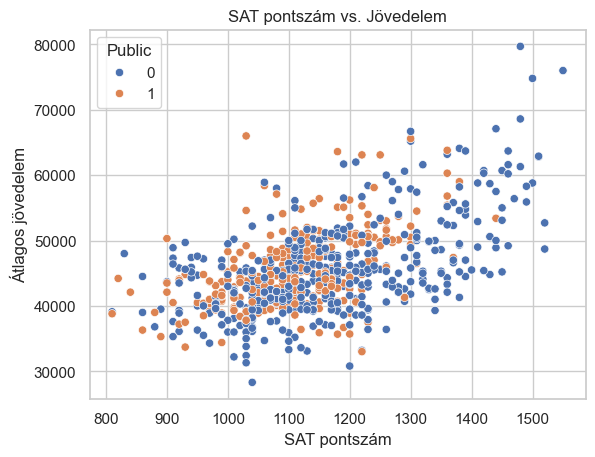

In [12]:

sns.scatterplot(x='SAT', y='Earn', hue='Public', data=df)
plt.title("SAT pontsz√°m vs. J√∂vedelem")
plt.xlabel("SAT pontsz√°m")
plt.ylabel("√Åtlagos j√∂vedelem")
plt.show()


### V√°ltoz√≥k: 
> x tengely: SAT pontsz√°m 
>
> y tengely: A hallgat√≥k √©ves szinti √°tlagos j√∂vedelme 5 √©vvel a diploma megszerz√©se ut√°n (USD)
> 
>üîµ Mag√°nint√©zm√©nyek hallgat√≥i (Public = 0)
>
>üü† √Ållami int√©zm√©nyek hallgat√≥i (Private = 1)

### Megfigyel√©sek:
   > Mind az √°llami, mind a mag√°nint√©zm√©nyek hallgat√≥i hasonl√≥ SAT ‚Äì j√∂vedelem mint√°t mutatnak.
   > 
   > A kiugr√≥an magas j√∂vedelmek t√∂bbnyire mag√°nint√©zm√©nyekhez k√∂t≈ëdnek.
   > 
   > Az √°tlagos SAT tartom√°nyban √©s j√∂vedelmi szinten mindk√©t csoport hasonl√≥ s≈±r≈±s√©ggel jelenik meg.

### K√∂vetkeztet√©sek:
   > √Åltal√°noss√°gban elmondhat√≥, hogy magasabb SAT pontsz√°mhoz magasabb j√∂vedelem t√°rsul.

# Korrel√°ci√≥s m√°trix

A korrel√°ci√≥s m√°trix seg√≠ts√©g√©vel megvizsg√°ljuk, hogy az egyetemek k√ºl√∂nb√∂z≈ë numerikus jellemz≈ëi milyen line√°ris kapcsolatban √°llnak egym√°ssal.

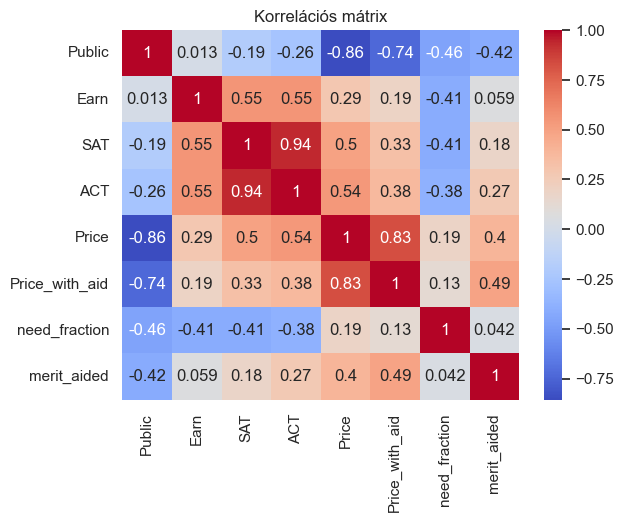

In [8]:

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korrel√°ci√≥s m√°trix")
plt.show()


> **+1**: teljes pozit√≠v line√°ris kapcsolat,
>
>  **0**: nincs line√°ris kapcsolat,
>
> **‚Äì1**: teljes negat√≠v line√°ris kapcsolat.
### Megfigyel√©sek:
#### 1. √Ållami vs. mag√°nint√©zm√©ny
   > Price **(‚àí0.86)** √©s Price_with_aid **(‚àí0.74)**: Er≈ës negat√≠v korrel√°ci√≥. Az √°llami egyetemek j√≥val olcs√≥bbak, mind teljes √°rban, mind t√°mogat√°ssal.
   >
   > Earn **(0.013)**: Nincs l√©nyegi korrel√°ci√≥ a v√©gz√©st k√∂vet≈ë j√∂vedelemmel.
   > 
   > SAT **(‚àí0.19)** √©s ACT **(‚àí0.26)**: Gyenge negat√≠v kapcsolat. Mag√°negyetemeken √°ltal√°ban magasabbak a pontsz√°mok.
#### 2. J√∂vedelem 5 √©v ut√°n
   >SAT **(0.55)** √©s ACT **(0.55)**: K√∂zepes pozit√≠v korrel√°ci√≥. A magasabb felv√©teli pontsz√°mokkal rendelkez≈ë egyetemek v√©gz≈ësei jobban keresnek.
   >
   >Price **(0.29)** √©s Price_with_aid **(0.19)**: Enyhe pozit√≠v kapcsolat. A dr√°g√°bb egyetemek v√©gz≈ësei kiss√© t√∂bbet keresnek, de nem er≈ëteljes hat√°s.
   >
   >need_fraction **(‚àí0.41)**: Negat√≠v kapcsolat. Ahol t√∂bb a r√°szorul√≥ hallgat√≥, az √°tlagj√∂vedelem alacsonyabb.

#### 3. √Årak
   > Price - Price_with_aid **(0.83)**: Er≈ës korrel√°ci√≥. A t√°mogat√°s m√©rt√©ke ugyanarra az alaptand√≠jra √©p√ºl.
   >
   > Price - merit_aided **(0.40)**: M√©rs√©kelt pozit√≠v kapcsolat. A dr√°g√°bb iskol√°k gyakrabban ny√∫jtanak √∂szt√∂nd√≠jat.
   >
   > Price - need_fraction **(0.19)**: Gyenge kapcsolat. Az √°r kev√©ss√© f√ºgg att√≥l, hogy h√°nyan kapnak sz√ºks√©galap√∫ t√°mogat√°st.

#### 4. T√°mogat√°sok
   > merit_aided - Price_with_aid **(0.49)**: Pozit√≠v kapcsolat van a t√°mogatott √°r √©s √∂szt√∂nd√≠jak k√∂z√∂tt.
   >
   > merit_aided - need_fraction **(0.042)**: Nagyon gyenge kapcsolat. az √©rdem, √©s sz√ºks√©galap√∫ t√°mogat√°s nem felt√©tlen ugyanazokat a hallgat√≥kat c√©lozza.

### K√∂vetkeztet√©sek:
> A dr√°g√°bb, mag√°nint√©zm√©nyek √°ltal√°ban jobb felv√©teli pontsz√°m√∫ di√°kokat vonzanak, t√∂bb √∂szt√∂nd√≠jat k√≠n√°lnak, √©s magasabb j√∂vedelm≈± v√©gz≈ëseik vannak.
>
> Az √°llami egyetemek olcs√≥bbak, de kev√©sb√© szelekt√≠vek.
>
> A j√∂vedelem jobban √∂sszef√ºgg az akad√©miai felk√©sz√ºlts√©ggel, mint az √°rakkal vagy t√°mogat√°sokkal.










## Bar Chart

A bar chart seg√≠ts√©g√©vel meghat√°rozzuk, mely amerikai fels≈ëoktat√°si int√©zm√©nyek ny√∫jtj√°k a legjobb √°r-√©rt√©k ar√°nyt a hallgat√≥k sz√°m√°ra.

#### Az √°r-√©rt√©k ar√°nyt a k√∂vetkez≈ë k√©plettel sz√°moltuk:
> Ez az ar√°ny azt mutatja meg, hogy 1 doll√°r befizetett t√°mogatott √°r√©rt mennyi v√°rhat√≥ j√∂vedelmet kap a hallgat√≥.

In [ ]:
df['value_ratio'] = df['Earn'] / df['Price_with_aid']

#### Adatok kiv√°laszt√°sa, rendez√©se, √©s az √°bra l√©trehoz√°sa

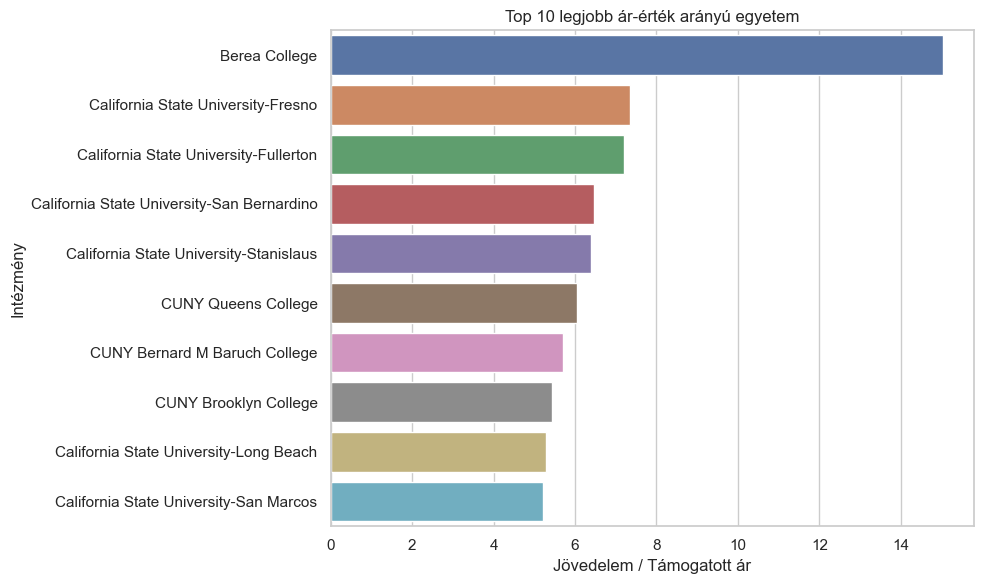

In [68]:


top_value = df[['School', 'Earn', 'Price_with_aid', 'value_ratio']].sort_values(by='value_ratio', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(data=top_value, y='School', x='value_ratio', hue='School', legend = False)
plt.xlabel("J√∂vedelem / T√°mogatott √°r")
plt.ylabel("Int√©zm√©ny")
plt.title("Top 10 legjobb √°r-√©rt√©k ar√°ny√∫ egyetem")
plt.tight_layout()
plt.show()


### Megfigyel√©sek: 
>Berea College kiemelkedik a mez≈ënyb≈ël, t√∂bb mint 14-szeres megt√©r√ºl√©st k√≠n√°l, messze maga m√∂g√∂tt hagyva a t√∂bbi int√©zm√©nyt.
>
> A t√∂bbi egyetem, mint p√©ld√°ul a California State University k√ºl√∂nb√∂z≈ë campusai √©s a CUNY h√°l√≥zat is j√≥l teljes√≠tenek, 5‚Äì6-szoros √©rt√©kar√°nyt mutatva.
>
> A list√°n f≈ëleg √°llami vagy √°llamilag t√°mogatott int√©zm√©nyek szerepelnek, amelyek olcs√≥bb k√©pz√©st k√≠n√°lnak, de a v√©gz√©st k√∂vet≈ëen versenyk√©pes j√∂vedelemmel lehet sz√°molni.

### K√∂vetkeztet√©sek:
>Az √°r-√©rt√©k ar√°ny alapj√°n nem felt√©tlen√ºl a legh√≠resebb vagy legdr√°g√°bb egyetemek ny√∫jtj√°k a legjobb megt√©r√ºl√©st.
>
> √ârdemes figyelembe venni az egyetem t√°mogatott √°r√°t √©s a v√°rhat√≥ j√∂vedelmet, azok sz√°m√°ra akik k√∂lts√©ghat√©kony, de hossz√∫ t√°von j√∂vedelmez≈ë d√∂nt√©st akarnak hozni.

# K-K√∂z√©p Klaszterez√©s 

 A fels≈ëoktat√°si int√©zm√©nyeket jellemz≈ë attrib√∫tumok alapj√°n homog√©n csoportokra bontjuk.
 
 Ezzel felfedezhetj√ºk, hogy milyen t√≠pus√∫ egyetemek jellemz≈ëk az adathalmazon bel√ºl.

 #### Kiv√°lasztjuk az elemz√©shez haszn√°lt jellemz≈ëket az adathalmazb√≥l:

>**(SAT, ACT)**: Ezek a jellemz≈ëk meghat√°rozz√°k az int√©zm√©ny akad√©miai szintj√©t,
>
>**(Price, aid)**: p√©nz√ºgyi hozz√°f√©rhet≈ës√©g√©t,
>
>**(Earn)** : v√°rhat√≥ √°tlagos j√∂vedelm√©t.
>
>Nincs c√©lv√°ltoz√≥

In [10]:
features = ['SAT', 'ACT', 'Earn', 'Price', 'Price_with_aid', 'need_fraction', 'merit_aided']
x = df[features]

> Hi√°nyz√≥ √©rt√©keket a megfelel≈ë oszlop medi√°nj√°val helyettes√≠t√ºnk.

In [11]:
x = x.fillna(x.median())

 > Adatok standardiz√°l√°sa.

In [12]:
x_scaled = StandardScaler().fit_transform(x)

> Dimenzi√≥cs√∂kkent√©s PCA-val, 2 dimenzi√≥ra sz≈±k√≠tj√ºk az adatokat.

In [13]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

> KMeans klaszterez√©si modell-t hozunk l√©tre 3 klaszterrel.

In [42]:
kmeans = KMeans(n_clusters=3, random_state=0)

> KMeans modellt alkalmazzuk a standardiz√°lt adatokra, √©s elmentj√ºk a hozz√°rendelt klaszterc√≠mk√©ket.

In [43]:

kmeans_labels = kmeans.fit_predict(x_scaled)


> A f≈ëkomponensekre cs√∂kkentett 2D adatokat √°br√°zoljuk scatter plot form√°j√°ban, a klaszterc√≠mk√©k szerint sz√≠nezve.

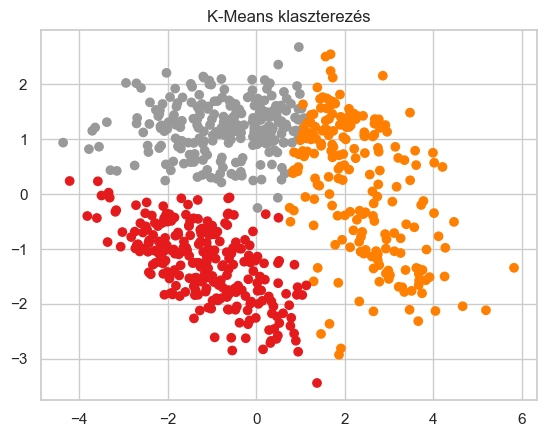

In [44]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans_labels, cmap='Set1')
plt.title("K-Means klaszterez√©s")
plt.show()

### Megfigyel√©sek: 
> 1. Klaszter üî¥ (alacsonyabb √°r√∫ egyetemek, sok t√°mogat√°ssal)
>
> 2. Klaszter üîò (k√∂z√©pkateg√≥ri√°s egyetemek)
>
> 3. Klaszter üü† (elit, dr√°ga egyetemek)

### K√∂vetkeztet√©sek:
>A K-Means klaszterez√©s sikeresen csoportos√≠totta az int√©zm√©nyeket profil alapj√°n.
>
>A csoportok j√≥l √©rtelmezhet≈ëk: √°r, t√°mogat√°s, felv√©teli szint √©s v√°rhat√≥ kereset ment√©n k√ºl√∂n√ºlnek el.
>
#### Az eredm√©nyek hasznosak lehetnek:
>
>√ñszt√∂nd√≠j program kialak√≠t√°s√°ra
>
>Int√©zm√©nyi √∂sszehasonl√≠t√°sra

# DBSCAN klaszterez√©s 

A DBSCAN algoritmus seg√≠ts√©g√©vel azonos√≠tjuk a term√©szetes klasztereket az egyetemek jellemz≈ëi alapj√°n, illetve felt√°rjuk azokat az int√©zm√©nyeket, amelyek kil√≥gnak a megszokott mint√°zatb√≥l.

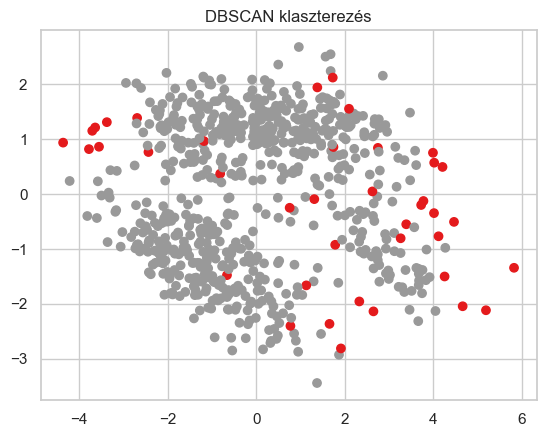

In [17]:

dbscan = DBSCAN(eps=1.5, min_samples= 20)
dbscan_labels = dbscan.fit_predict(x_scaled)

plt.scatter(x_pca[:,0], x_pca[:,1], c=dbscan_labels, cmap='Set1')
plt.title("DBSCAN klaszterez√©s")
plt.show()


### Megfigyel√©sek:

> üîò Pontok egyetlen klasztert alkotnak.
>
> üî¥ Pontok azok az adatok, amelyeket a DBSCAN outliernek (zajnak) tekint, nem tartoznak egyetlen klaszterhez sem.

### K√∂vetkeztet√©s:
> Az adatok nagy r√©sze viszonylag s≈±r≈± csoportosul√°st mutat.
> 
> N√©h√°ny adatpont kil√≥g a mint√°b√≥l. Ezek lehetnek extr√©m √©rt√©kek vagy elt√©r≈ë jellemz≈ëkkel rendelkez≈ë int√©zm√©nyek. ( pl. nagyon dr√°ga vagy olcs√≥, nagyon magas vagy alacsony SAT/ACT pontsz√°m).



# Line√°ris regresszi√≥ 

Milyen m√©rt√©kben lehet a v√©gzettek √°tlagj√∂vedelm√©t megj√≥solni az int√©zm√©ny jellemz≈ëi alapj√°n?

 #### Bemeneti v√°ltoz√≥k √©s c√©lv√°ltoz√≥ defini√°l√°sa, indokl√°sa

> **SAT, ACT**: A felv√©teli pontsz√°mok t√ºkr√∂zhetik a hallgat√≥k k√©pess√©geit.
>
> **Price, Price_with_aid**: A tand√≠j szintje hat√°ssal lehet az int√©zm√©ny min≈ës√©g√©re √©s hossz√∫ t√°v√∫ karrierkil√°t√°sokra.
>
> **need_fraction, merit_aided**: A t√°mogat√°si ar√°nyok jelezhetik az int√©zm√©ny el√©rhet≈ës√©g√©t √©s √∂szt√∂nz≈ë rendszereit.

In [69]:

x_reg = df[['SAT', 'ACT', 'Price', 'Price_with_aid', 'need_fraction', 'merit_aided']]
y_reg = df['Earn']


> Adat feloszt√°s tan√≠t√≥ √©s teszt adathalmazra

In [70]:

x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)


> Line√°ris regresszi√≥ l√©trehoz√°sa √©s betan√≠t√°sa, el≈ërejelz√©s a teszt halmazon

In [71]:

model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

print("Linear R2:", r2_score(y_test, y_pred1))


Linear R2: 0.35412966137329127


> R¬≤ = 0.354: Az attrib√∫tumok a c√©lv√°ltoz√≥ varianci√°j√°nak kb. 35%-√°t magyar√°zz√°k.
>
>Ez m√©rs√©kelt magyar√°z√≥er≈ëre utal.

### K√∂vetkeztet√©sek: 
>A hallgat√≥i kereset r√©szben megj√≥solhat√≥ a felv√©teli pontsz√°mok √©s int√©zm√©nyi k√∂lts√©gek alapj√°n.
>
>Egyszer≈±en √©rtelmezhet≈ë, de nem fog megragadni bonyolultabb √∂sszef√ºgg√©seket.

#### Random Forest oszt√°lyoz√°si modell

RF oszt√°lyoz√°si modell-t alkalmazunk annak meg√°llap√≠t√°s√°ra, hogy egy int√©zm√©ny v√©gzett hallgat√≥inak j√∂vedelme a teljes minta medi√°n√©rt√©ke felett van-e vagy sem.

In [72]:

model2 = RandomForestClassifier()
model2.fit(x_train, y_train > y_reg.median())
y_pred2 = model2.predict(x_test)
print("RandomForest Classification accuracy:", accuracy_score(y_test > y_reg.median(), y_pred2))


RandomForest Classification accuracy: 0.6619718309859155


> A modell a tesztmint√°k 68%-√°ban helyesen oszt√°lyozza be az egyetemeket aszerint, hogy a v√©gzett hallgat√≥k keresete magasabb-e a medi√°nn√°l

# Logisztikus Regresszi√≥

Logisztikus regresszi√≥t alkalmazunk annak oszt√°lyoz√°s√°ra, hogy egy adott egyetem √°llami (1) vagy mag√°n (0) int√©zm√©ny-e, k√ºl√∂nb√∂z≈ë jellemz≈ëk alapj√°n, amelyre t√∂bb modellt is kipr√≥b√°lunk √©s √∂sszehasonl√≠tunk.



#### Bemeneti v√°ltoz√≥k √©s c√©lv√°ltoz√≥ defini√°l√°sa, indokl√°sa:
> 
> **SAT** √©s **ACT**: A felv√©teli k√∂vetelm√©nyek szintj√©t mutatj√°k, a mag√°negyetemek jellemz≈ëen elt√©r≈ë pontokat v√°rnak.
>
>**Price**: A tand√≠j gyakran magasabb a mag√°nint√©zm√©nyekn√©l.
>
>**need_fraction**: a r√°szorul√≥ hallgat√≥k ar√°nya k√ºl√∂nb√∂zhet int√©zm√©nyt√≠pusonk√©nt.



In [73]:
x_cls = df[['SAT', 'ACT', 'Price', 'need_fraction']]
y_cls = df['Public']

#### Adat feloszt√°s tan√≠t√≥ √©s teszt adathalmazra
>
> A modell √©rt√©kel√©s√©hez az adatok 80%-√°t tan√≠tjuk, 20%-√°t tesztel√©sre tartjuk fenn.

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_cls, y_cls, test_size=0.2, random_state=42)

#### Logisztikus regresszi√≥ modell

In [75]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
print("LogReg Accuracy:", accuracy_score(y_test, y_pred_log))

LogReg Accuracy: 0.9859154929577465


#### KNN algoritmus

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.971830985915493


#### Random Forest oszt√°lyoz√°si modell

In [77]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))

RandomForest Accuracy: 0.9788732394366197


#### Confusion Matrix

In [78]:
print("Confusion Matrix (RF):\n", confusion_matrix(y_test, y_pred_rf))
print("F1 Score (RF):", f1_score(y_test, y_pred_rf))
print("Classification Report (RF):\n", classification_report(y_test, y_pred_rf))

Confusion Matrix (RF):
 [[85  2]
 [ 1 54]]
F1 Score (RF): 0.972972972972973
Classification Report (RF):
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       0.96      0.98      0.97        55

    accuracy                           0.98       142
   macro avg       0.98      0.98      0.98       142
weighted avg       0.98      0.98      0.98       142



#### √ñsszegz√©s:
>**Precision (0)**: A mag√°n int√©zm√©nyk√©nt besorolt egyetemek 99%-a val√≥ban mag√°n.
>
>**Recall (1)**: Az √°llami egyetemeket 98%-os pontoss√°ggal felismeri a modell.
>
>**√Åltal√°nos pontoss√°g (F1 score)**: 98%, teh√°t kiv√°l√≥ teljes√≠tm√©ny.